# Train-test split

------------------
![GitHub](https://img.shields.io/github/license/nicolastolosa/AirBnbModel)

**Author:** Nicolás Tolosa (github nicolastolosa)

**Achievements:** **(1)** Separation of the train and test datasets for ``users`` and ``sessions`` datasets, using *stratified train_test split* to mantain the proportion of the target variable ``country_destination`` in both datasets. Data has been saved into ``exploration_data/02_train`` and ``exploration_data/03_test``.

-------------
### Introduction <a class="tocSkip"> </a>

The purpose of this notebook is to separate ``sessions`` and ``users`` datasets into train and test datasets. *Train* datasets will be used to perform further exploratory analysis and train several ML predictive models, while *test* datasets will be used to confirm hipotheses on the data and final testing of ML models.

As it has been seen during the previous exploration ``01_first_exploration``, the target variable is highly inbalanced. For that reason, *stratified train_test_split method* will be used, based on ``country_destination`` variable. The purpose is to mantain the ratios of that variable in both ``train`` and ``test`` datasets.

### Summary of the analysis <a class="tocSkip"> </a> 

1. ``Users`` and ``sessions`` datasets have been loaded. Only columns that contain information about the *user_id* and *country_destination* have been loaded.


2. Both datasets have been processed, in order to get unique, non-null user ids.


3. ``users`` and ``sessions`` datasets have been merged to filter users that are present in both datasets.


4. A *stratified train_test_split* has been performed, using ``country_destination`` as a reference to stratify both datasets. The result of this are two dataframes, ``id_train`` and ``id_test`` containing the *user ids* for both train and test datasets. The size of the *test* dataset has been set to a 20% of the whole dataset.


5. ``users`` and ``sessions`` datasets have been filtered by using ``id_train`` and ``id_test``


6. The resulting 6 datasets ``users_train``, ``users_test``, ``sessions_train`` and ``sessions_test`` have been saved into ``notebooks/exploration_data/train`` and ``notebooks/exploration_data/test``


### Important notes!  <a class="tocSkip"> </a>
**The data necessary to run this notebook, has not been included in the repository due to license limitations. Before running this notebook, make sure to run the code in ``AirBnbModel/notebooks/01_download_data/notebook.ipynb`` to download the data into ``AirBnbModel/notebooks/exploration_data/``**

<div class="alert alert-block alert-warning">
<b>Warning:</b> For the data of this project to be accessible, the terms and conditions of the Kaggle competition must be accepted first. Details can be found in the following page: <a href="https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data"> Airbnb New User Bookings | Kaggle </a>
    
</div>

----------

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Libraries" data-toc-modified-id="1.-Libraries-1">1. Libraries</a></span></li><li><span><a href="#2.-Load-data" data-toc-modified-id="2.-Load-data-2">2. Load data</a></span></li><li><span><a href="#3.-Processing" data-toc-modified-id="3.-Processing-3">3. Processing</a></span></li><li><span><a href="#4.-Train-test-split" data-toc-modified-id="4.-Train-test-split-4">4. Train-test split</a></span><ul class="toc-item"><li><span><a href="#4.1-Separation-of-train-and-test-datasets" data-toc-modified-id="4.1-Separation-of-train-and-test-datasets-4.1">4.1 Separation of train and test datasets</a></span></li><li><span><a href="#4.2-Saving-data" data-toc-modified-id="4.2-Saving-data-4.2">4.2 Saving data</a></span></li></ul></li></ul></div>

In [1]:
%load_ext watermark
%watermark

Last updated: 2021-09-15T08:27:30.493126+02:00

Python implementation: CPython
Python version       : 3.9.5
IPython version      : 7.21.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
CPU cores   : 4
Architecture: 64bit



## 1. Libraries
------------------

In [2]:
# Set /notebooks dir to path to import modules
import sys, os
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

In [3]:
# Import libraries
# ----------------

# data manipulation
import pandas as pd

# machine learning
from sklearn.model_selection import train_test_split

# # Visualization
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import seaborn as sns

from modules.plots import column_autolabel

plt.style.use('ggplot')
sns.set(style='whitegrid', palette='Blues_d')

In [4]:
# Path of the source data
ROOT_PATH = '../exploration_data/01_raw'

## 2. Load data
------------------

First, ``users`` and ``sessions`` datasets have been loaded as ``users_ids`` and ``sessions_ids``. Only columns related to the *user ids* and the country of destination have been loaded, as they will be used later for merging both datasets and to stratify the split.

In [5]:
# Loading users data
users_path = os.path.join(ROOT_PATH, 'train_users_2.csv')
users_ids = (
    pd.read_csv(
        filepath_or_buffer=users_path,
        usecols=['id', 'country_destination'],
        index_col='id'
    )        
)
    
users_ids.head()

,country_destination
id,
gxn3p5htnn,NDF
820tgsjxq7,NDF
4ft3gnwmtx,US
bjjt8pjhuk,other
87mebub9p4,US


In [6]:
# Loading sessions data
sessions_path = os.path.join(ROOT_PATH, 'sessions.csv')
sessions_ids = (
    pd.read_csv(
        filepath_or_buffer=sessions_path,
        usecols=['user_id'],
        index_col='user_id'
    )        
)
    
sessions_ids.head()

""
user_id
d1mm9tcy42
d1mm9tcy42
d1mm9tcy42
d1mm9tcy42
d1mm9tcy42


## 3. Processing
-----------------


Next, ``users.ids`` and ``sessions.ids`` have been preprocessed, to leave only unique and non-null *user ids*. 

In [7]:
users_unique_ids = (
    users_ids
    .query("index.unique()", engine="python")
    .query("index.notnull()", engine="python")
    .rename_axis(index='user_id')
)
users_unique_ids.head()

,country_destination
user_id,
gxn3p5htnn,NDF
820tgsjxq7,NDF
4ft3gnwmtx,US
bjjt8pjhuk,other
87mebub9p4,US


In [8]:
sessions_unique_ids = pd.Series(
    sessions_ids
    .index
    .unique()
    .dropna()
)
sessions_unique_ids.head()

0    d1mm9tcy42
1    yo8nz8bqcq
2    4grx6yxeby
3    ncf87guaf0
4    4rvqpxoh3h
Name: user_id, dtype: object

Finally, both datasets **have been merged** using an *inner join*, in order to obtain **those users that belong to both ``users`` and ``sessions`` datasets.**

In [9]:
valid_users = pd.merge(
    left=sessions_unique_ids,
    right=users_unique_ids,
    how='inner',
    on='user_id'
)
valid_users

,user_id,country_destination
0,d1mm9tcy42,other
1,yo8nz8bqcq,NDF
2,4grx6yxeby,NDF
3,ncf87guaf0,NDF
4,4rvqpxoh3h,GB
...,...,...
73810,zxodksqpep,NDF
73811,mhewnxesx9,NDF
73812,6o3arsjbb4,NDF
73813,jh95kwisub,NDF


## 4. Train-test split
------------------------------

Next, *train_test split* has been performed, using *sklearn train_test_split* method. 

As it has been seen during the previous analysis ``01_first_exploration``, the target variable **is highly inbalanced**.
To maintain the proportion of each target category in bot train and test dataset, a stratified split has been performed.

In the following plot, the distribution of the target variable ``country_destination`` can be seen. That distribution has been used as a reference to perform the split.

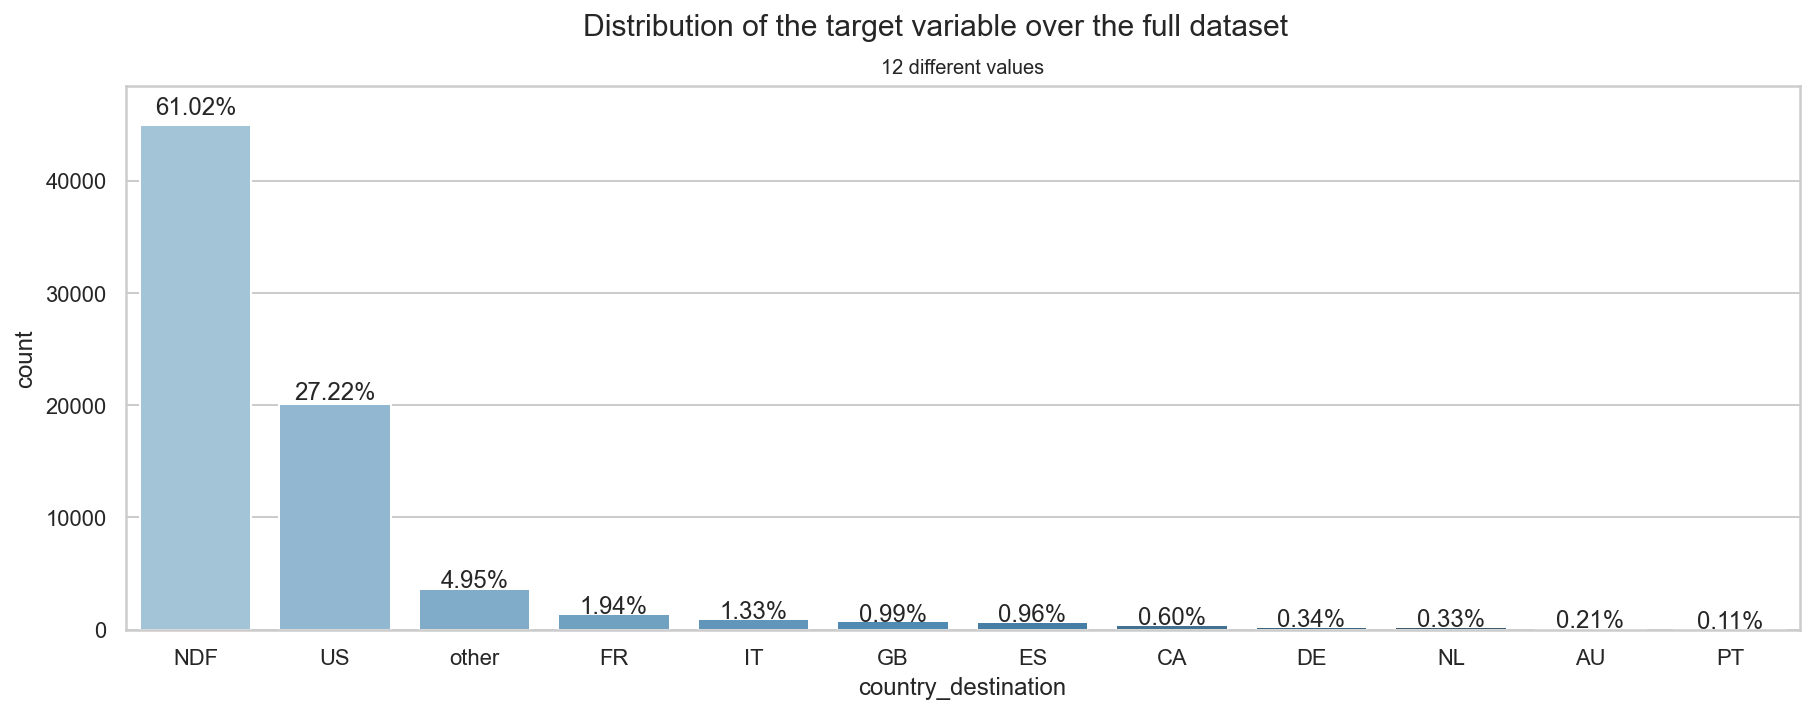

In [10]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1,1,1)

order = (
    valid_users
    .country_destination
    .value_counts()
    .to_frame()
)
ax_1 = sns.countplot(
    x="country_destination",
    data=valid_users,
    palette="Blues_d",
    order = order.index
)


# Formatting
column_autolabel(ax = ax_1, total_ratio = valid_users.country_destination.count())

title = f"{order.count().values[0]} different values"
plt.title(title, fontsize = 10)
plt.suptitle('Distribution of the target variable over the full dataset', fontsize = 15)

plt.show()

The following function, uses the dataframe obtained in the previous section, to get the user_ids of those users that will be used for training and for testing.

> **Testing dataset size has been set to 20% of all the unique, non-null users that belong to both ``users`` and ``sessions`` datasets**.

In [11]:
id_train, id_test = train_test_split(valid_users.user_id, test_size = 0.2,
                                     stratify = valid_users.country_destination, random_state = 42)

### 4.1 Separation of train and test datasets

Once the train and test *user_ids* have been obtained, the full ``users`` and ``sessions`` datasets have been loaded, so they can be separated into train and test.

In [12]:
# Loading full users dataset
full_users = (
    pd.read_csv(
        filepath_or_buffer=users_path,
        index_col='id'
    )        
)

# Loading full sessions dataset
full_sessions = (
    pd.read_csv(
        filepath_or_buffer=sessions_path,
        index_col='user_id'
    )        
)

In [13]:
users_train = full_users[full_users.index.isin(id_train)]
users_test = full_users[full_users.index.isin(id_test)]

print(f"users train dataset shape: {users_train.shape}")
print(f"users test dataset shape: {users_test.shape}")

users train dataset shape: (59052, 15)
users test dataset shape: (14763, 15)


In [14]:
sessions_train = full_sessions[full_sessions.index.isin(id_train)]
sessions_test = full_sessions[full_sessions.index.isin(id_test)]

print(f"sessions train dataset shape: {sessions_train.shape}")
print(f"sessions test dataset shape: {sessions_test.shape}")

sessions train dataset shape: (4421819, 5)
sessions test dataset shape: (1116138, 5)


### 4.2 Saving data

Finally, the data has been saved into new folders. A *csv* containing only the *ids* of the users has been also saved into each folder.

In [15]:
# Definition and creation of the folder to contain the training data
train_destination = '../exploration_data/02_train'
os.makedirs(train_destination, exist_ok=True)

# Save training data
users_train.to_csv(os.path.join(train_destination, 'users.csv'))
sessions_train.to_csv(os.path.join(train_destination, 'sessions.csv'))

# Save user_id data
id_train.to_csv(os.path.join(train_destination, 'ids.csv'))

In [16]:
# Definition and creation of the folder to contain the training data
test_destination = '../exploration_data/03_test'
os.makedirs(test_destination, exist_ok=True)

# Save training data
users_test.to_csv(os.path.join(test_destination, 'users.csv'))
users_test.to_csv(os.path.join(test_destination, 'sessions.csv'))

# Save user_id data
id_test.to_csv(os.path.join(test_destination, 'ids.csv'))